In [1]:
from Functions import*


In [2]:
from statistics import *

In [3]:
test_list_covid, train_list_covid,val_list_covid=create_list_to_load(covid=True)

test_list_Noncovid, train_list_Noncovid,val_list_Noncovid=create_list_to_load(covid=False)

In [4]:
test_covid_labels=create_list_labels(test_list_covid,covid=True)
train_covid_labels=create_list_labels(train_list_covid,covid=True)
val_covid_labels=create_list_labels(val_list_covid,covid=True)

test_Noncovid_labels=create_list_labels(test_list_Noncovid,covid=False)
train_Noncovid_labels=create_list_labels(train_list_Noncovid,covid=False)
val_Noncovid_labels=create_list_labels(val_list_Noncovid,covid=False)

In [5]:
test_list,test_labels=concatenate_lists_and_labels(test_list_covid,test_covid_labels,test_list_Noncovid,test_Noncovid_labels)
train_list,train_labels=concatenate_lists_and_labels(train_list_covid,train_covid_labels,train_list_Noncovid,train_Noncovid_labels)
val_list,val_labels=concatenate_lists_and_labels(val_list_covid,val_covid_labels,val_list_Noncovid,val_Noncovid_labels)

In [6]:
test_list,test_labels=shuffle_lists(test_list, test_labels)
train_list,train_labels=shuffle_lists(train_list, train_labels)
val_list,val_labels=shuffle_lists(val_list, val_labels)




In [7]:
total_list=test_list+train_list+val_list
total_labels=test_labels+train_labels+val_labels

In [8]:
total_list,total_labels=shuffle_lists(total_list, total_labels)

train_percent=0.8
length = len(total_list)
train_length = int(length*train_percent)

train_set=total_list[0:train_length]
train_labels=total_labels[0:train_length]
val_set=total_list[:train_length]
val_labels=total_labels[:train_length]

In [9]:
#the article precises the size of the images as (480,480)

img_w,img_h,img_ch=480,480,1


train_set=load_data(train_set,img_w,img_h,img_ch)
val_set=load_data(val_set,img_w,img_h,img_ch)


train_labels=np.array(train_labels)
val_labels=np.array(val_labels)


In [10]:
from skimage.io import imshow

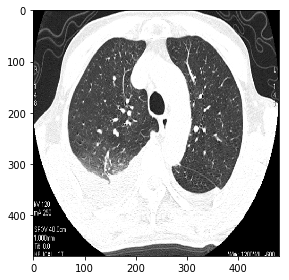

In [11]:
imshow(np.squeeze(train_set[0]),cmap='gray')

In [12]:
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

In [14]:
INPUT_SHAPE=480,480,1
N_CLASSES=1

K.clear_session()
my_model=densenet(INPUT_SHAPE,N_CLASSES,dropout=True,dr=0.2)
my_model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 480, 480, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 240, 240, 64) 3200        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 120, 120, 64) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization_v2_1 (Batch (None, 120, 120, 64) 256         max_pooling2d[0][0]              
______________________________________________________________________________________________

In [15]:
learning_rate=0.0001
optimizer=Adam(learning_rate)
batch_size=16
loss_function = 'binary_crossentropy'
metrics=['binary_accuracy',precision,recall]
n_epochs=100

In [16]:
my_model.compile(loss=loss_function,optimizer = optimizer,metrics=['binary_accuracy'])

In [17]:
model_hist=my_model.fit(train_set,train_labels,batch_size,n_epochs,validation_data=(val_set, val_labels))

Train on 596 samples, validate on 596 samples
Epoch 1/100
596/596 [==============================] - 16s 27ms/sample - loss: 0.6663 - binary_accuracy: 0.6678 - val_loss: 0.6887 - val_binary_accuracy: 0.5453
Epoch 2/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.5773 - binary_accuracy: 0.6997 - val_loss: 0.7574 - val_binary_accuracy: 0.5453
Epoch 3/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.5520 - binary_accuracy: 0.7148 - val_loss: 1.0083 - val_binary_accuracy: 0.5453
Epoch 4/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.5702 - binary_accuracy: 0.7064 - val_loss: 0.7617 - val_binary_accuracy: 0.5453
Epoch 5/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.5100 - binary_accuracy: 0.7483 - val_loss: 0.9665 - val_binary_accuracy: 0.5453
Epoch 6/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.4843 - binary_accuracy: 0.7685 - val_loss: 1.2270 - val_binary_accur

596/596 [==============================] - 11s 19ms/sample - loss: 0.0543 - binary_accuracy: 0.9832 - val_loss: 0.3144 - val_binary_accuracy: 0.9027
Epoch 52/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.1731 - binary_accuracy: 0.9362 - val_loss: 4.6058 - val_binary_accuracy: 0.6057
Epoch 53/100
596/596 [==============================] - 12s 20ms/sample - loss: 0.0954 - binary_accuracy: 0.9648 - val_loss: 0.4730 - val_binary_accuracy: 0.7869
Epoch 54/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.0836 - binary_accuracy: 0.9732 - val_loss: 0.5398 - val_binary_accuracy: 0.8859
Epoch 55/100
596/596 [==============================] - 11s 19ms/sample - loss: 0.0901 - binary_accuracy: 0.9648 - val_loss: 0.2882 - val_binary_accuracy: 0.9094
Epoch 56/100
596/596 [==============================] - 12s 19ms/sample - loss: 0.0814 - binary_accuracy: 0.9664 - val_loss: 0.1872 - val_binary_accuracy: 0.9178
Epoch 57/100
596/596 [===================

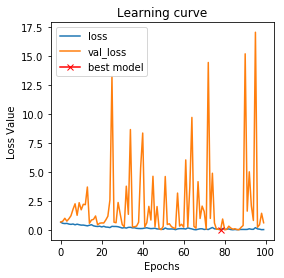

In [18]:
loss_curves_plot(model_hist)

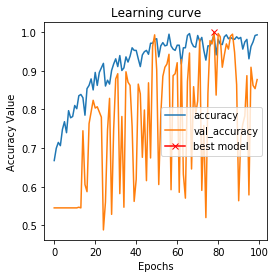

In [19]:
accuracy_curves_plot(model_hist,'binary_accuracy')

0


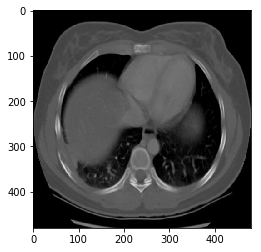

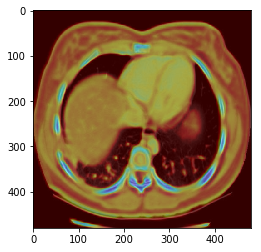

In [22]:
Sample = train_list[9]
Img = imread(Sample)
Img = Img[:,:,0]
Img = Img/255
Img = resize(Img, (img_h, img_w), anti_aliasing = True).astype('float32')
Img = np.expand_dims(Img, axis = 2)
Img = np.expand_dims(Img, axis = 0)
preds = my_model.predict(Img)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = my_model.output[:, class_idx]
last_conv_layer = my_model.get_layer("conv2d_4")
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([my_model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([Img])
for i in range(16):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
img = cv2.imread(Sample)
img = cv2.resize(img, (480, 480), interpolation = cv2.INTER_AREA)
#img = img/255
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(superimposed_img)